In [1]:
# Import all essential libraries

import os
import csv
import math
import numpy as np
import networkx as nx
import scipy.constants as sc
import matplotlib.pyplot as plt
import random as r

In [2]:
# Defining the compound class

class Compound():
    def __init__(self, name, number):
        self._name = name + " " + str(number)
        self._number = number
        self._valency = self.get_valence()

    def get_valence(self):
        name = self._name.split()[0]
        if name == "H":
            return 1
        elif name == "C":
            return 4
        elif name == "N":
            return 3
        elif name == "O":
            return 2
        elif name == "S":
            return 2

    def update_valency(self):
        neig = len(G[self])
        # print(G[self])
        max_val = self.get_valence()
        if neig > max_val:
            raise ValueError('Compound has more neighbours than valence')
        else:
            self._valency = max_val - neig
        
    def get_total_valence(self):
        neig = len(G[self])
        free_electrons = self.get_valence() - neig
        return free_electrons
        
        
    def __repr__(self):
        G = nx.Graph()
        G.add_node(self._name, data = self)
        nx.draw(G, with_labels=True)
        return self._name

In [3]:
# Defining the atom list in the Graph

H_list = [Compound("H", i) for i in range(1,33)]
C_list = [Compound("C", i) for i in range(33, 41)]
O_list = [Compound("O", i) for i in range(41, 49)]
N_list = [Compound("N", i) for i in range(49, 57)]

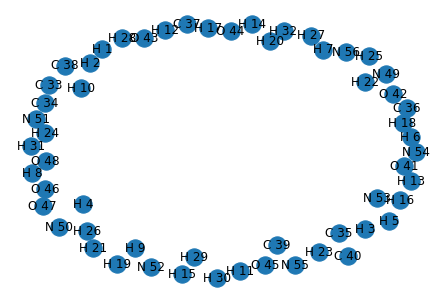

In [4]:
# Creating the graph with just atoms

G = nx.Graph()
for i,lst in enumerate([H_list, C_list, O_list, N_list]):
    for comp in lst:
        G.add_node(comp._name, data=comp)
nx.draw(G, with_labels=True)
plt.show()

In [5]:
# Function to update the valencies of the atoms

def fix_valencies(G):
    for node in nx.nodes(G):
        degree = len(G[node])
        if degree > 0:
            node.update_valency()

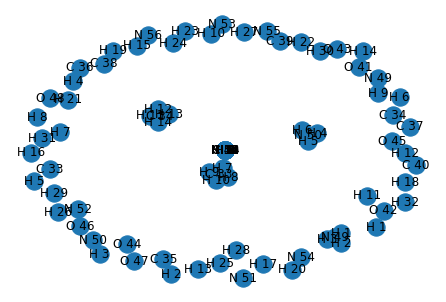

In [6]:
# Adding all the nodes


G.add_edges_from([(H_list[0], N_list[0]), (N_list[0], H_list[1]), (N_list[0], H_list[2])])
G.add_edges_from([(H_list[3], N_list[1]), (N_list[1], H_list[4]), (N_list[1], H_list[5])])

G.add_edges_from([(H_list[6], C_list[0]), (H_list[7], C_list[0]), (H_list[8], C_list[0]), (H_list[9], C_list[0])])
G.add_edges_from([(H_list[10], C_list[1]), (H_list[11], C_list[1]), (H_list[12], C_list[1]), (H_list[13], C_list[1])])

fix_valencies(G)

nx.draw(G, with_labels=True)
plt.show()

{N 49, H 3, H 1, H 2}
{H 5, N 50, H 4, H 6}
{C 33, H 8, H 9, H 7, H 10}
{H 11, H 12, C 34, H 13, H 14}


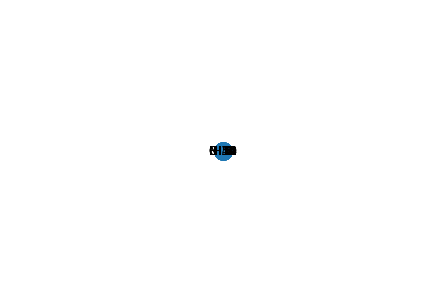

In [7]:
# Get all the connected components in the graph

all_compounds = nx.connected_components(G)

for compound in all_compounds:
    if len(compound) > 1: 
        print(compound)

In [8]:
# Function to calculate H

def calculate_H(data, T):
    [a_2, a_1, a0, a1, a2, a3, a4, a5, _] = data

    H = sc.R*T*(-a_2*T**-2 + a_1*T**-1*np.log(T) + a0 + 0.5*a1*T + (a2*T**2)/3 + 0.25*a3*T**3 + 0.2*a4*T**4 +a5*T**-1)
    return H

In [9]:
# Function to calculate S

def calculate_S(data, T):
    [a_2, a_1, a0, a1, a2, a3, a4, _, a6] = data

    S = sc.R*(-0.5*a_2*T**-2 - a_1*T**-1 + a0*np.log(T) + a1*T + 0.5*a2*T**2 + (a3*T**3/3) + 0.25*a4*T**4 + a6)

    return S

In [10]:
# Function to calculate G

def calculate_G(H, S, T):
    G = H - T*S
    return G

In [11]:
# Code to get the H, S and G data for a whole dataset

def get_lib_data(libraries_list, temperature, path):
    # libraries_list = rmg_link_lists()

    H_lists = []
    S_lists = []
    G_lists = []

    H_list = []
    S_list = []
    G_list = []

    for lib in libraries_list:
        os.chdir(path)

        compound_list = os.listdir()        

        directory = f"{lib}_data"
        if os.path.exists(f"{directory}/csv"):
            print("CSV folder exists")
            os.chdir(f"{directory}/csv")
        
            compound_list = os.listdir()

            for file_name in compound_list:
                fin = open(file_name)
                reader = csv.reader(fin)
                data = []
                if (temperature > 100 and temperature < 1074.56):
                    for i in reader:
                        data.append(float(i[0]))
                else:
                    for i in reader:
                        data.append(float(i[1]))

                H = calculate_H(data, temperature)
                S = calculate_S(data, temperature)
                G = calculate_G(S, H, temperature)

                H_list.append(H)
                S_list.append(S)
                G_list.append(G)

            H_lists.append(H_list)
            S_lists.append(S_list)
            G_lists.append(G_list)

    return [H_lists, S_lists, G_lists]

In [12]:
# path = os.getcwd()
# libraries_list = ['primaryThermoLibrary', 'DFT_QCI_thermo', 'GRI-Mech3.0', 'CBS_QB3_1dHR', 'thermo_DFT_CCSDTF12_BAC', 'SABIC_aromatics', 'C3', 'Fulvene_H', 'BurkeH2O2', 'Chlorinated_Hydrocarbons', 'Narayanaswamy', 'CHN', 'surfaceThermoPt', 'vinylCPD_H', 'SulfurGlarborgH2S', 'naphthalene_H', 'NOx2018', 'iodinated_Hydrocarbons', 'JetSurF1.0', 'surfaceThermoNi', 'SulfurGlarborgMarshall', 'CH', 'NitrogenCurran', 'CHO', 'bio_oil', 'SulfurLibrary', 'C10H11', 'Klippenstein_Glarborg2016', 'primaryNS', 'CurranPentane', 'USC-Mech-ii', 'GRI-Mech3.0-N', 'JetSurF2.0', 'FFCM1(-)', 'SulfurGlarborgNS', 'NISTThermoLibrary', 'Lai_Hexylbenzene', 'SulfurHaynes', 'CN', 'BurcatNS', 'SulfurGlarborgBozzelli', 'Chernov', 'CHON']

# [H_lists, S_lists, G_lists] = get_lib_data(libraries_list, 700, path)

# for lib,H_list,S_list,G_list in zip(libraries_list, H_lists, S_lists, G_lists):
#     print(lib)

#     for H, S, G in zip(H_list, S_list, G_list):
#         print("%.2f" %H, end="\t\t")
#         print("%.2f" %S, end="\t\t")
#         print("%.2f" %G)

In [13]:
# Code to calculate the H, S and G values for specific compound

def get_single_compound_data(lib, temperature, path, file_name):
    os.chdir(path)  

    directory = f"{lib}_data"    
    if os.path.exists(f"{directory}/csv"):
        print("CSV folder exists")
        os.chdir(f"{directory}/csv")
        
        fin = open(file_name)
        reader = csv.reader(fin)
        data = []
        if (temperature > 100 and temperature < 1074.56):
            for i in reader:
                data.append(float(i[0]))
        else:
            for i in reader:
                data.append(float(i[1]))

        H = calculate_H(data, temperature)
        S = calculate_S(data, temperature)
        G = calculate_G(H, S, temperature)
        
        os.chdir(path)
        return (H, S, G)
    else:
        print("The file requested is unavailable")

In [14]:
# A test example for calculating G

temperature = 700
path = os.getcwd()

# Details for NH3 (Ammonia)
# https://rmg.mit.edu/database/thermo/molecule/1%20N%20u0%20p1%20c0%20%7B2,S%7D%20%7B3,S%7D%20%7B4,S%7D%0A2%20H%20u0%20p0%20c0%20%7B1,S%7D%0A3%20H%20u0%20p0%20c0%20%7B1,S%7D%0A4%20H%20u0%20p0%20c0%20%7B1,S%7D%0A
ammonia_lib = "NOx2018"
ammonia_file_name = "65.csv"

result = get_single_compound_data(ammonia_lib, temperature, path, ammonia_file_name)
print(result)

CSV folder exists
(-28703.85868409499, 227.77781807246183, -188148.33133481827)


[['H 1'], ['H 2'], ['H 3'], ['H 4'], ['H 5'], ['H 6'], ['H 7'], ['H 8'], ['H 9'], ['H 10'], ['H 11'], ['H 12'], ['H 13'], ['H 14'], ['H 15'], ['H 16'], ['H 17'], ['H 18'], ['H 19'], ['H 20'], ['H 21'], ['H 22'], ['H 23'], ['H 24'], ['H 25'], ['H 26'], ['H 27'], ['H 28'], ['H 29'], ['H 30'], ['H 31'], ['H 32'], ['C 33'], ['C 34'], ['C 35'], ['C 36'], ['C 37'], ['C 38'], ['C 39'], ['C 40'], ['O 41'], ['O 42'], ['O 43'], ['O 44'], ['O 45'], ['O 46'], ['O 47'], ['O 48'], ['N 49'], ['N 50'], ['N 51'], ['N 52'], ['N 53'], ['N 54'], ['N 55'], ['N 56']]
[[N 49, H 3, H 1, H 2], [H 5, N 50, H 4, H 6], [C 33, H 8, H 9, H 7, H 10], [H 11, H 12, C 34, H 13, H 14]]


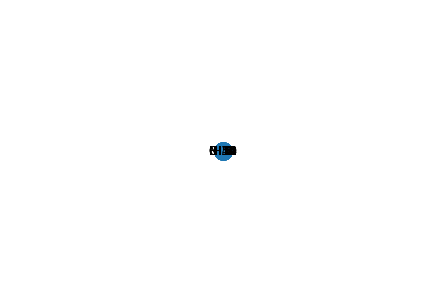

In [15]:
# Get the list of all components and atoms

atoms = []
compounds = []
all_compounds = nx.connected_components(G)
list_compounds = list(all_compounds)

all_c = []
for i in range(len(list_compounds)):
    all_c.append(list(list_compounds[i]))

for i in all_c:
    if len(i) == 1:
        atoms.append(i)
    else:
        compounds.append(i)
            
print(atoms)
print(compounds)

In [18]:
free_electrons = []
for compound in compounds:
    val = 0
    compound_contrib = {}
    for atom in compound:
        compound_contrib[atom] = atom.get_total_valence()
        val += atom.get_total_valence()
    free_electrons.append((val, compound_contrib))
    
for i in range(len(compounds)):
    print(compounds[i], free_electrons[i])

In [ ]:
# Loop through the atoms and components
# The following are the conditions used:
#   - Choice 1: Loop thorugh the atoms
n_a = len(atoms)
n_c = len(compounds)

#Truth values for which entity is chosen
a = 0
c = 0

choice = r.randint(0,3)

# Choosing 2 atoms to check the feasibility of edge formation 
# where i and j represent indices from the appropriate list.
# Taking input from user for G values

if choice == 0:
    a = 2
    i = r.randint(0,n_a-1)
    j = r.randint(0,n_a-1)
    print('Choosing two atoms : %s and %s'%(atoms[i],atoms[j]))
    Gi_1 = input('Enter G value of %s: '%atoms[i])
    Gi_2 = input('Enter G value of %s: '%atoms[j])
    
# Choosing 2 compounds to check the feasibility of edge formation
elif choice == 1:
    c = 2
    i = r.randint(0,n_c-1)
    j = r.randint(0,n_c-1)
    print('Choosing two compounds: %s and %s'%(compounds[i],compounds[j]))
    Gi_1 = input('Enter G value of %s: '%compounds[i])
    Gi_2 = input('Enter G value of %s: '%compounds[j])
# Choosing an atom and a compound to check the feasibility of edge formation
elif choice == 2:
    a = 1
    c = 1
    i = r.randint(0,n_a-1)
    j = r.randint(0,n_c-1)
    print('Choosing an atom and a compound: %s and %s'%(atoms[i],compounds[j]))
    Gi_1 = input('Enter G value of %s: '%atoms[i])
    Gi_2 = input('Enter G value of %s: '%compounds[j])


In [ ]:
#Identifying prospective product after edge formation of the two chosen entities.

if c == 1: #Case where an atom and a compound are chosen
    species = compounds[j]
    n = len(species)
    for p in range(n):
        valency = get_valence
        

In [ ]:
#Simulated Annealing

# Variables -
# Gi_1 = calculated G of initial compound 1
# Gi_2 = calculated G of initial compound 2
# Gf = calculated G of final compound if edge formation occurs.

# Number of cycles
n = 50
# Number of trials per cycle
m = 50
# Number of accepted solutions
na = 0.0

# Probability of accepting worse solution at the start
p_initial = 0.7
# Probability of accepting worse solution at the end
p_final = 0.001

# Initial temperature
t_initial = -1.0/math.log(p_initial)
# Final temperature
t_final = -1.0/math.log(p_final)
# Fractional reduction every cycle
frac = (t_final/t_initial)**(1.0/(n-1.0))

t = t_initial
for i in range(n):
    print('Cycle: ' + str(i) + ' with Temperature: ' + str(t))
    for j in range(m):
        # Generate new trial points
        # iterate over the list of connected components and find a new trial compound that can be combined - find 2.
        initial_diff_G = Gf - (Gi_1 + Gi_2)
        
        if (initial_diff_G<0):
            # Initialize DeltaE_avg if a worse solution was found
            #   on the first iteration
            if (i==0 and j==0):
                diff_G = initial_diff_G
            # objective function is worse
            # generate probability of acceptance
            p = math.exp(-initial_diff_G/(diff_G * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
        if (accept==True):
            #create an edge between the 2 elements. (should satisfy valency and that should be checked earlier)
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            diff_G = (diff_G*(na-1.0) +  initial_diff_G) / na
    # Record the lowest G values at the end of every cycle (this was a part of the original code. we need not do this)
    # Lower the temperature for next cycle
    t = frac*t